In [2]:
#importar los datos de test del total de los datos

import os
import shutil


# Directorio de imágenes
d_name = r'C:\Users\Maria Silvia\Downloads\rawdata\rawdata'
output_dir = r'C:\Users\Maria Silvia\Downloads\rawdata\test_faces'

# Crear el directorio de salida si no existe
os.makedirs(output_dir, exist_ok=True)

# Lista de imágenes de prueba
test_faces = '4831,3228,4469,1927,1329,5109,2922,2748,4679,1905,4813,3038,3804,2777,4480,3497,2545,2121,2313,5136,1596,4222,1750,3007,3235,4010,1562,3651,2783,4474,4646,1334,3463,3803,1768,4028,4814,1902,3669,2589,2119,2925,4641,1333,3464,3656,2784,4473,3232,4017,1565,4225,1757,3000,2314,5131,1591,2126,3490,2542,2770,4487,1934,4648,3009,3835,4822,2913,5138,1598,2779,3499,4021,1553,3204,3036,4213,1761,2580,3452,4677,1305,4445,3660,2574,4683,2746,3694,5107,2322,2110,1795,4489,2128,2914,4019,4825,1759,3832,3658,1933,2117,1792,5100,2325,2741,3693,2573,4684,4442,3667,2587,3455,4670,1302,3031,4214,1766,4026,1554,3203,2371,5154,4086,3091,2143,2527,2715,1356,4624,3401,3633,4416,1958,3257,2385,1500,4072,1732,4240,3859,3065,1993,2518,3892,2940,4885,3866,2188,4871,3268,4429,1967,1369,1735,4247,3062,3250,2382,1507,4849,4075,3634,4411,1351,4623,3406,2712,2520,2978,3096,2144,2376,5153,4081,3439,1960,1538,4876,5198,3861,4278,4882,2349,3895,2947,1994,1969,4427,3602,3430,1367,4615,3868,2186,3054,1703,4271,1531,4043,5191,3266,2172,4285,5165,2340,3292,2724,2516,1393,3259,4840,2985,3857,1358,1956,4418,2529,4088,2971,2511,1394,2723,5162,2347,3295,2949,2175,4282,4878,1536,4044,5196,3261,2181,3053,1704,4276,3437,1360,4612,4420,3605,2976,3098,2378,1951,3408,4249,2982,3850,4847,1509,1758,3833,4824,4018,3659,1932,4488,2915,2129,2586,3454,1303,4671,4443,3666,1555,4027,3202,3030,1767,4215,5101,2324,2116,1793,2572,4685,2740,3692,1599,5139,2912,3498,2778,4649,1935,4823,3834,3008,2747,3695,2575,4682,2111,1794,5106,2323'

# Convertir la lista a un conjunto de enteros
test_faces_set = set(map(int, test_faces.split(',')))

# Iterar sobre los archivos en el directorio
for nfile in os.listdir(d_name):

        if int(nfile) in test_faces_set:
            src = os.path.join(d_name, nfile)
            dst = os.path.join(output_dir, nfile)
            try:
                shutil.move(src, dst)
                print(f'Movido: {src} -> {dst}')
            except FileNotFoundError:
                print(f'Archivo no encontrado: {src}')
            except Exception as e:
                print(f'Error al mover {src}: {e}')

In [8]:
import os
import random
from PIL import Image # type: ignore

# Directorio de imágenes
d_name_test = r'C:\Users\Maria Silvia\Downloads\rawdata\test_faces'
d_name_train = r'C:\Users\Maria Silvia\Downloads\rawdata\rawdata'
image_size = (128, 128) 
sample = 1

X_train = []
X_test = []

# Iterar sobre los archivos en el directorio
for nfile in os.listdir(d_name_train):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name_train,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X_train.append(np.array(img).flatten())

# Convertir la lista a un arreglo NumPy
X_train = np.array(X_train)
print(X_train.shape)

# Iterar sobre los archivos en el directorio
for nfile in os.listdir(d_name_test):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name_test,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X_test.append(np.array(img).flatten())

# Convertir la lista a un arreglo NumPy
X_test = np.array(X_test)
print(X_test.shape)

(3693, 16384)
(300, 16384)


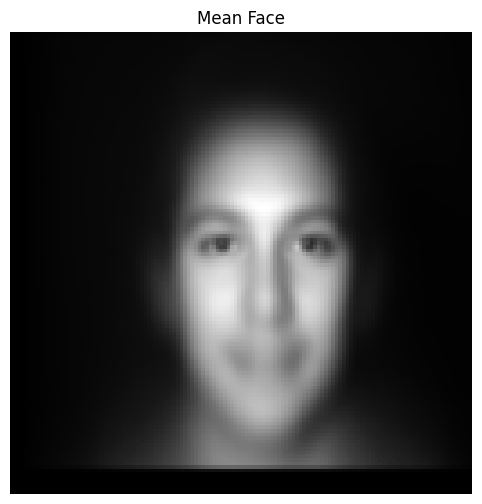

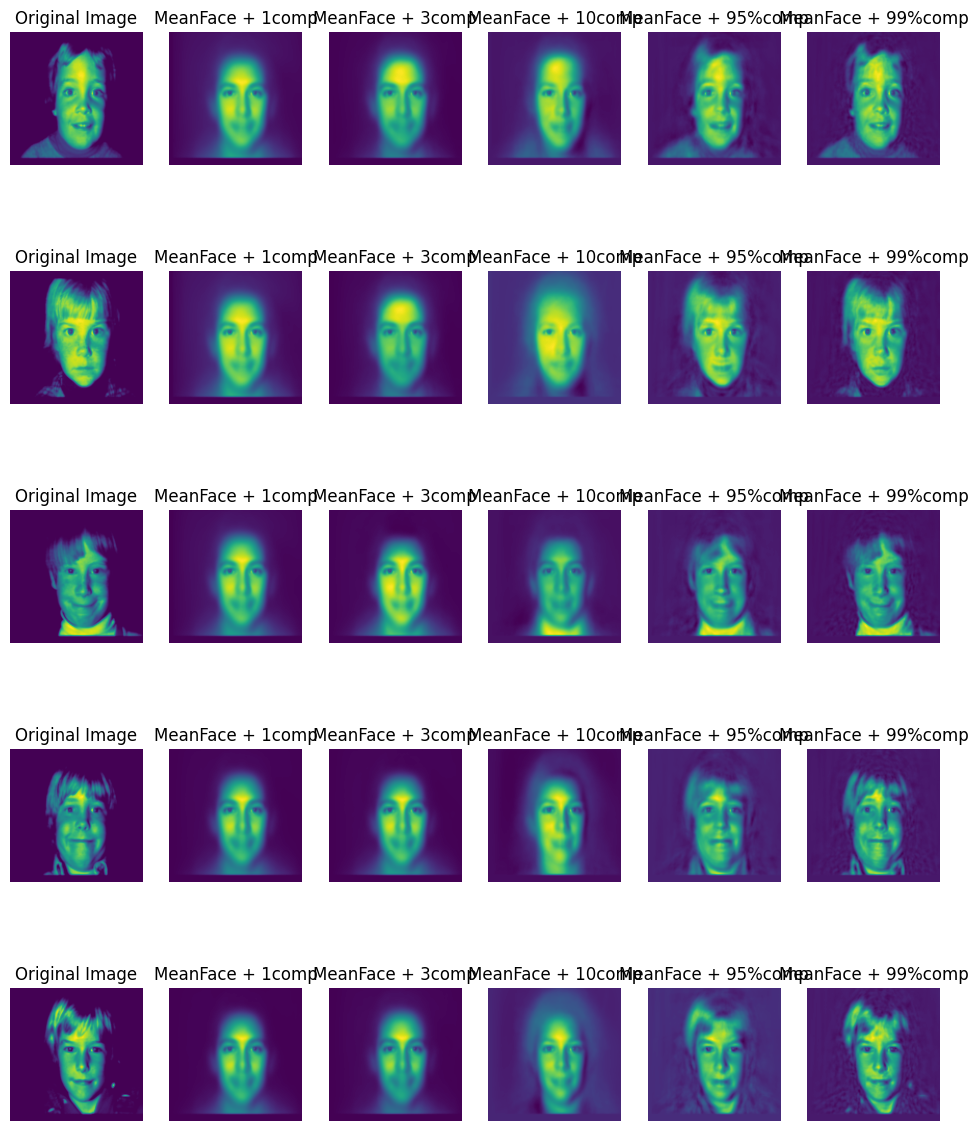

Datos de prueba reducidos guardados en: C:\Users\Maria Silvia\kagle\reduced_test_data2.csv


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import os

# Supongamos que X_train es tu matriz de datos de entrenamiento con tamaño (300, 16384)
# y X_test es la matriz de datos de prueba

# Paso 1: Calcular y visualizar la Mean Face
mean_face = np.mean(X_train, axis=0).reshape(image_size)
plt.figure(figsize=(10, 6))
plt.imshow(mean_face, cmap='gray')
plt.title('Mean Face')
plt.axis('off')
plt.show()

# Centrar los datos
centered_data = X_train - np.mean(X_train, axis=0)

# Paso 2: Aplicar PCA y reconstrucción con diferentes números de componentes
def pca_reconstruction(X, mean_face, n_components):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(X - mean_face)
    reconstructed_data = pca.inverse_transform(reduced_data) + mean_face
    return reconstructed_data

# Reconstruir los datos con diferentes números de componentes
reconstructed_1comp = pca_reconstruction(X_train, np.mean(X_train, axis=0), 1)
reconstructed_3comp = pca_reconstruction(X_train, np.mean(X_train, axis=0), 3)
reconstructed_10comp = pca_reconstruction(X_train, np.mean(X_train, axis=0), 10)

# Componentes que explican el 95% de la varianza
pca_95 = PCA(n_components=0.95)
reduced_data_95 = pca_95.fit_transform(X_train - np.mean(X_train, axis=0))
reconstructed_95comp = pca_95.inverse_transform(reduced_data_95) + np.mean(X_train, axis=0)

# Componentes que explican el 99% de la varianza
pca_99 = PCA(n_components=0.99)
reduced_data_99 = pca_99.fit_transform(X_train - np.mean(X_train, axis=0))
reconstructed_99comp = pca_99.inverse_transform(reduced_data_99) + np.mean(X_train, axis=0)

# Preparar datos para visualización
def plot_images(original, reconstructed, titles):
    num_images = len(original)
    num_titles = len(titles)
    
    plt.figure(figsize=(12, num_images * 3))
    
    for i in range(num_images):
        plt.subplot(num_images, num_titles + 1, i * (num_titles + 1) + 1)
        plt.imshow(original[i].reshape(image_size))
        plt.title('Original Image')
        plt.axis('off')
        
        for j, (title, recon_image) in enumerate(reconstructed.items()):
            plt.subplot(num_images, num_titles + 1, i * (num_titles + 1) + j + 2)
            plt.imshow(recon_image[i].reshape(image_size), cmap="viridis")
            plt.title(f'MeanFace + {title}')
            plt.axis('off')

    plt.show()

# Reconstrucción de imágenes
reconstructed = {
    '1comp': reconstructed_1comp,
    '3comp': reconstructed_3comp,
    '10comp': reconstructed_10comp,
    '95%comp': reconstructed_95comp,
    '99%comp': reconstructed_99comp
}

# Visualizar los resultados
plot_images(
    original=X_train[:5],  # Primeras 5 imágenes originales
    reconstructed=reconstructed,
    titles=['1', '3', '10', '95%', '99%']
)

# Paso 5: Aplicar PCA a los datos de prueba
pca_test = PCA(n_components=1)
reduced_test_data = pca_test.fit_transform(X_test - np.mean(X_train, axis=0))

# Obtener IDs de las imágenes de prueba
# Asegúrate de tener los IDs en el orden correcto o en un formato que puedas utilizar para crear el DataFrame
ID_LIST = [
    1302, 1303, 1305, 1329, 1333, 1334, 1351, 1356, 1358, 1360,
    1367, 1369, 1393, 1394, 1500, 1507, 1509, 1531, 1536, 1538,
    1553, 1554, 1555, 1562, 1565, 1591, 1596, 1598, 1599, 1703,
    1704, 1732, 1735, 1750, 1757, 1758, 1759, 1761, 1766, 1767,
    1768, 1792, 1793, 1794, 1795, 1902, 1905, 1927, 1932, 1933,
    1934, 1935, 1951, 1956, 1958, 1960, 1967, 1969, 1993, 1994,
    2110, 2111, 2116, 2117, 2119, 2121, 2126, 2128, 2129, 2143,
    2144, 2172, 2175, 2181, 2186, 2188, 2313, 2314, 2322, 2323,
    2324, 2325, 2340, 2347, 2349, 2371, 2376, 2378, 2382, 2385,
    2511, 2516, 2518, 2520, 2527, 2529, 2542, 2545, 2572, 2573,
    2574, 2575, 2580, 2586, 2587, 2589, 2712, 2715, 2723, 2724,
    2740, 2741, 2746, 2747, 2748, 2770, 2777, 2778, 2779, 2783,
    2784, 2912, 2913, 2914, 2915, 2922, 2925, 2940, 2947, 2949,
    2971, 2976, 2978, 2982, 2985, 3000, 3007, 3008, 3009, 3030,
    3031, 3036, 3038, 3053, 3054, 3062, 3065, 3091, 3096, 3098,
    3202, 3203, 3204, 3228, 3232, 3235, 3250, 3257, 3259, 3261,
    3266, 3268, 3292, 3295, 3401, 3406, 3408, 3430, 3437, 3439,
    3452, 3454, 3455, 3463, 3464, 3490, 3497, 3498, 3499, 3602,
    3605, 3633, 3634, 3651, 3656, 3658, 3659, 3660, 3666, 3667,
    3669, 3692, 3693, 3694, 3695, 3803, 3804, 3832, 3833, 3834,
    3835, 3850, 3857, 3859, 3861, 3866, 3868, 3892, 3895, 4010,
    4017, 4018, 4019, 4021, 4026, 4027, 4028, 4043, 4044, 4072,
    4075, 4081, 4086, 4088, 4213, 4214, 4215, 4222, 4225, 4240,
    4247, 4249, 4271, 4276, 4278, 4282, 4285, 4411, 4416, 4418,
    4420, 4427, 4429, 4442, 4443, 4445, 4469, 4473, 4474, 4480,
    4487, 4488, 4489, 4612, 4615, 4623, 4624, 4641, 4646, 4648,
    4649, 4670, 4671, 4677, 4679, 4682, 4683, 4684, 4685, 4813,
    4814, 4822, 4823, 4824, 4825, 4831, 4840, 4847, 4849, 4871,
    4876, 4878, 4882, 4885, 5100, 5101, 5106, 5107, 5109, 5131,
    5136, 5138, 5139, 5153, 5154, 5162, 5165, 5191, 5196, 5198
] 

# Verificar que el número de IDs coincida con el número de datos reducidos
if len(ID_LIST) != reduced_test_data.shape[0]:
    raise ValueError("El número de IDs no coincide con el número de datos reducidos.")

# Crear un DataFrame con IDs y la primera componente PCA
test_data_reduced_df = pd.DataFrame({
    'ID': ID_LIST,
    'label': reduced_test_data.flatten()
})

# Guardar los datos transformados en un archivo CSV
output_csv_path = r'C:\Users\Maria Silvia\kagle\reduced_test_data2.csv'
test_data_reduced_df.to_csv(output_csv_path, index=False)

print(f'Datos de prueba reducidos guardados en: {output_csv_path}')
